In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn import svm

import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image

from sklearn.tree import export_graphviz 
import seaborn as sns



In [3]:
!conda install pydotplus -y

Solving environment: ...working... done

# All requested packages already installed.



In [23]:
df=pd.read_csv('Documents/dataset/bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [24]:
corrmat=df.corr()
corrmat

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

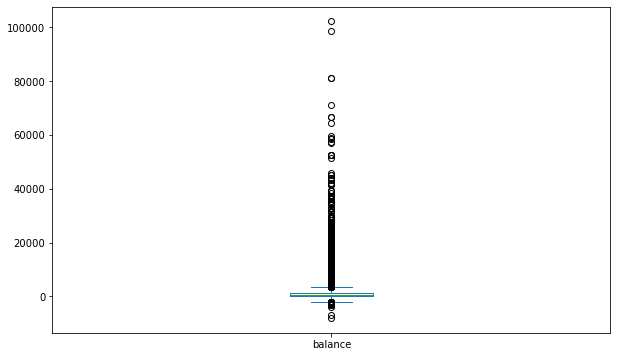

In [26]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [27]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [50]:
df.drop(df[df['balance']>1428].index ,axis=0,inplace=True)

In [51]:
df.drop(df[df['balance']<72].index ,axis=0,inplace=True)

In [52]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1174,36,technician,married,secondary,no,83,yes,no,unknown,8,may,178,1,-1,0,unknown,no
1175,39,blue-collar,married,secondary,no,125,yes,no,unknown,8,may,142,1,-1,0,unknown,no
1176,37,blue-collar,married,primary,no,190,yes,yes,unknown,8,may,194,1,-1,0,unknown,no
1184,42,entrepreneur,married,primary,no,198,yes,no,unknown,8,may,314,1,-1,0,unknown,no
1185,35,self-employed,married,primary,no,1094,yes,no,unknown,8,may,207,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45151,47,management,single,tertiary,no,311,yes,yes,cellular,9,nov,255,3,378,2,failure,no
45155,44,entrepreneur,married,tertiary,no,121,no,no,cellular,9,nov,248,1,91,1,success,yes
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45173,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no


<AxesSubplot:>

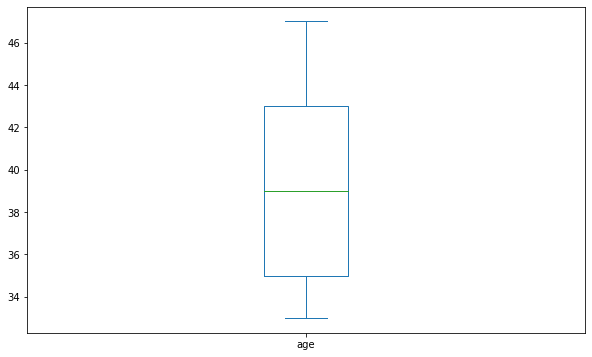

In [53]:
plt.figure(figsize=(10,6))
df.age.plot(kind='box')

In [54]:
df['age'].describe()

count    3011.000000
mean       39.089339
std         4.312809
min        33.000000
25%        35.000000
50%        39.000000
75%        43.000000
max        47.000000
Name: age, dtype: float64

In [55]:
df.drop(df[df['age']<32].index ,axis=0,inplace=True)

In [56]:
df.drop(df[df['age']>48].index ,axis=0,inplace=True)

In [57]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1174,36,technician,married,secondary,no,83,yes,no,unknown,8,may,178,1,-1,0,unknown,no
1175,39,blue-collar,married,secondary,no,125,yes,no,unknown,8,may,142,1,-1,0,unknown,no
1176,37,blue-collar,married,primary,no,190,yes,yes,unknown,8,may,194,1,-1,0,unknown,no
1184,42,entrepreneur,married,primary,no,198,yes,no,unknown,8,may,314,1,-1,0,unknown,no
1185,35,self-employed,married,primary,no,1094,yes,no,unknown,8,may,207,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45151,47,management,single,tertiary,no,311,yes,yes,cellular,9,nov,255,3,378,2,failure,no
45155,44,entrepreneur,married,tertiary,no,121,no,no,cellular,9,nov,248,1,91,1,success,yes
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45173,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no


<AxesSubplot:>

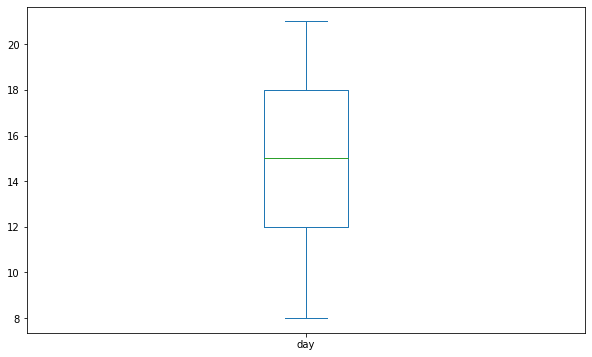

In [58]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [59]:
df['day'].describe()

count    3011.000000
mean       14.838924
std         4.085501
min         8.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        21.000000
Name: day, dtype: float64

In [60]:
df.drop(df[df['day']<8].index ,axis=0,inplace=True)
df.drop(df[df['day']>21].index ,axis=0,inplace=True)

In [61]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1174,36,technician,married,secondary,no,83,yes,no,unknown,8,may,178,1,-1,0,unknown,no
1175,39,blue-collar,married,secondary,no,125,yes,no,unknown,8,may,142,1,-1,0,unknown,no
1176,37,blue-collar,married,primary,no,190,yes,yes,unknown,8,may,194,1,-1,0,unknown,no
1184,42,entrepreneur,married,primary,no,198,yes,no,unknown,8,may,314,1,-1,0,unknown,no
1185,35,self-employed,married,primary,no,1094,yes,no,unknown,8,may,207,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45151,47,management,single,tertiary,no,311,yes,yes,cellular,9,nov,255,3,378,2,failure,no
45155,44,entrepreneur,married,tertiary,no,121,no,no,cellular,9,nov,248,1,91,1,success,yes
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45173,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no


<AxesSubplot:>

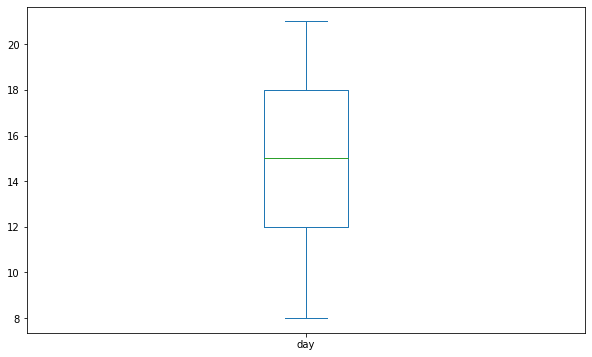

In [62]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [63]:
df['duration'].describe()

count    3011.000000
mean      185.371305
std        59.130991
min        98.000000
25%       135.000000
50%       176.000000
75%       231.000000
max       314.000000
Name: duration, dtype: float64

<AxesSubplot:>

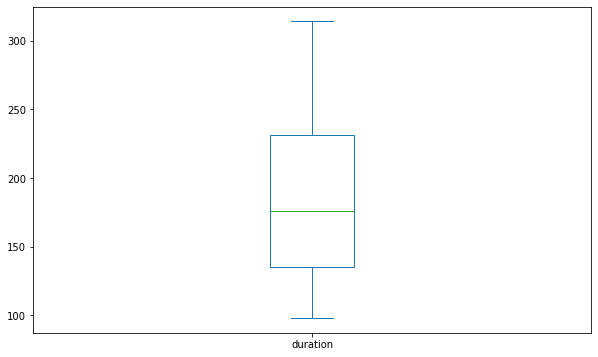

In [64]:
plt.figure(figsize=(10,6))
df.duration.plot(kind='box')

In [66]:
df.drop(df[df['duration']<135].index ,axis=0,inplace=True)
df.drop(df[df['duration']>231].index ,axis=0,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1174,36,technician,married,secondary,no,83,yes,no,unknown,8,may,178,1,-1,0,unknown,no
1175,39,blue-collar,married,secondary,no,125,yes,no,unknown,8,may,142,1,-1,0,unknown,no
1176,37,blue-collar,married,primary,no,190,yes,yes,unknown,8,may,194,1,-1,0,unknown,no
1185,35,self-employed,married,primary,no,1094,yes,no,unknown,8,may,207,1,-1,0,unknown,no
1186,41,management,married,tertiary,no,141,yes,yes,unknown,8,may,146,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45054,34,admin.,single,tertiary,no,1077,no,no,cellular,19,oct,218,1,151,5,other,no
45057,44,management,single,tertiary,no,1090,no,no,cellular,20,oct,178,4,93,6,success,yes
45147,42,admin.,divorced,secondary,no,490,yes,no,cellular,8,nov,212,1,97,5,other,no
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no


<AxesSubplot:>

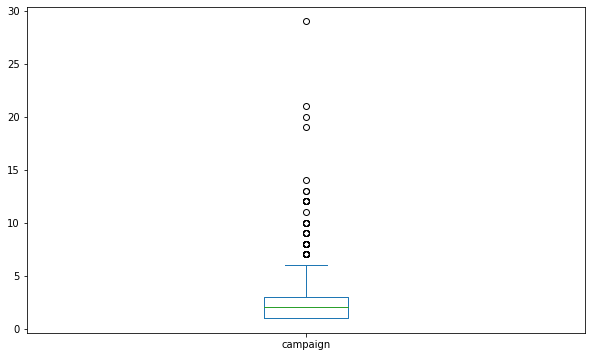

In [67]:
plt.figure(figsize=(10,6))
df.campaign.plot(kind='box')

In [69]:
df['campaign'].describe()

count    1519.000000
mean        2.440421
std         2.096229
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        29.000000
Name: campaign, dtype: float64

In [1]:
df.drop(df[df['campaign']>3].index ,axis=0,inplace=True)
plt.figure(figsize=(10,6))
df.campaign.plot(kind='box')


NameError: name 'df' is not defined

<AxesSubplot:>

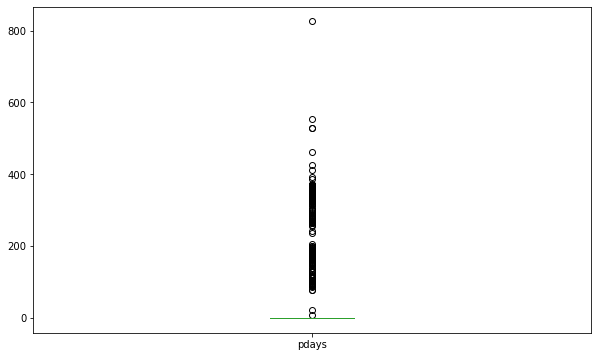

In [71]:
plt.figure(figsize=(10,6))
df.pdays.plot(kind='box')

In [72]:
df['pdays'].describe()

count    1232.000000
mean       56.198052
std       117.671332
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       826.000000
Name: pdays, dtype: float64

<AxesSubplot:>

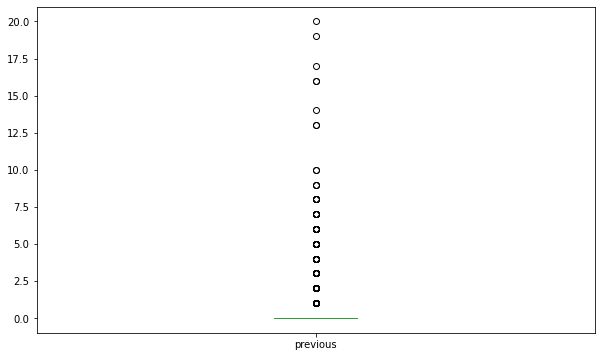

In [73]:
plt.figure(figsize=(10,6))
df.previous.plot(kind='box')

In [74]:
df['previous'].describe()

count    1232.000000
mean        0.696429
std         1.919684
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: previous, dtype: float64

In [75]:
df.drop(df[df['previous']>0].index ,axis=0,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1174,36,technician,married,secondary,no,83,yes,no,unknown,8,may,178,1,-1,0,unknown,no
1175,39,blue-collar,married,secondary,no,125,yes,no,unknown,8,may,142,1,-1,0,unknown,no
1176,37,blue-collar,married,primary,no,190,yes,yes,unknown,8,may,194,1,-1,0,unknown,no
1185,35,self-employed,married,primary,no,1094,yes,no,unknown,8,may,207,1,-1,0,unknown,no
1186,41,management,married,tertiary,no,141,yes,yes,unknown,8,may,146,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44799,43,blue-collar,married,primary,no,445,yes,no,unknown,15,sep,173,1,-1,0,unknown,no
44808,36,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,unknown,yes
44992,38,management,married,tertiary,no,1257,no,no,cellular,12,oct,166,1,-1,0,unknown,no
45043,39,admin.,divorced,secondary,no,728,yes,yes,cellular,18,oct,222,1,-1,0,unknown,yes


In [77]:
def preprocessor(df):
    res_df=df.copy()
    le=preprocessing.LabelEncoder()
    res_df['job']=le.fit_transform(res_df['job'])
    res_df['marital']=le.fit_transform(res_df['marital'])
    res_df['education']=le.fit_transform(res_df['education'])
    res_df['default']=le.fit_transform(res_df['default'])
    res_df['housing']=le.fit_transform(res_df['housing'])
    res_df['loan']=le.fit_transform(res_df['loan'])
    res_df['contact']=le.fit_transform(res_df['contact'])
    res_df['month']=le.fit_transform(res_df['month'])
    res_df['poutcome']=le.fit_transform(res_df['job'])
    res_df['Target']=le.fit_transform(res_df['job'])
    return res_df

In [78]:
encoded_df=preprocessor(df)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1174,36,9,1,1,0,83,1,0,2,8,8,178,1,-1,0,9,9
1175,39,1,1,1,0,125,1,0,2,8,8,142,1,-1,0,1,1
1176,37,1,1,0,0,190,1,1,2,8,8,194,1,-1,0,1,1
1185,35,6,1,0,0,1094,1,0,2,8,8,207,1,-1,0,6,6
1186,41,4,1,2,0,141,1,1,2,8,8,146,3,-1,0,4,4


In [80]:
x=encoded_df.drop('Target',axis=1).values
y=encoded_df['Target'].values

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [82]:
model_dt_2=DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train=model_dt_2.score(x_train,y_train)

model_dt_2_score_test=model_dt_2.score(x_test,y_test)
print('Training score',model_dt_2_score_train)
print('Testing score',model_dt_2_score_test)


Training score 0.7605263157894737
Testing score 0.7789473684210526


In [83]:
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_train=model_dt_4.score(x_train,y_train)

model_dt_4_score_test=model_dt_4.score(x_test,y_test)
print('Training score',model_dt_4_score_train)
print('Testing score',model_dt_4_score_test)

Training score 0.9263157894736842
Testing score 0.9421052631578948


In [84]:
model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_train=model_dt_6.score(x_train,y_train)

model_dt_6_score_test=model_dt_6.score(x_test,y_test)
print('Training score',model_dt_6_score_train)
print('Testing score',model_dt_6_score_test)

Training score 1.0
Testing score 1.0


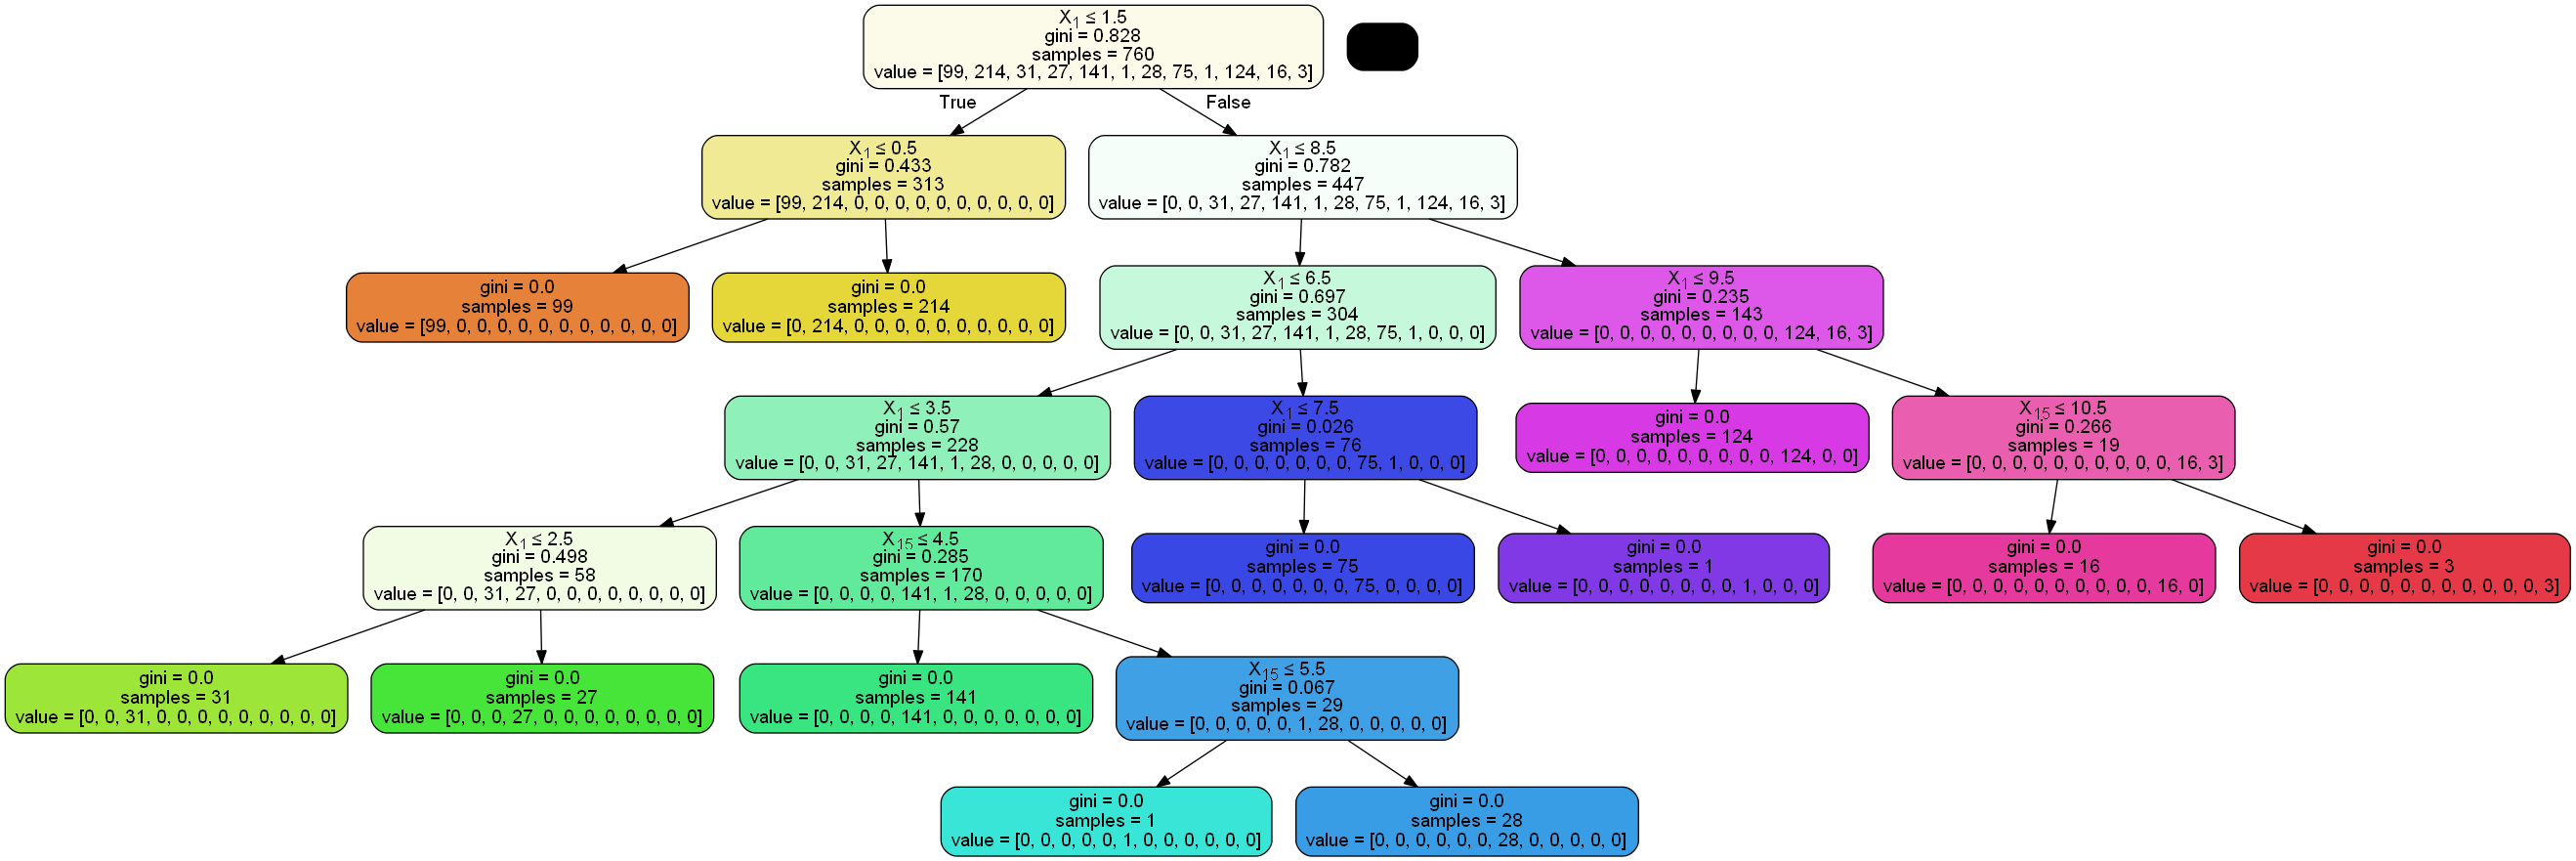

<Figure size 720x1440 with 0 Axes>

In [86]:
import pydotplus
plt.figure(figsize=(10,20))
dot_data=StringIO()
export_graphviz(model_dt_6,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())